# Pneumonia classification using radiomics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/pneumonia_classification')
print("sys.path:", sys.path)

sys.path: ['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/drive/MyDrive/pneumonia_classification']


In [3]:
import os
os.chdir('/content/drive/MyDrive/pneumonia_classification/')
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/pneumonia_classification


In [4]:
!pip install PyWavelets

In [ ]:
#!pip install -r requirements.txt

In [5]:
"""
Main script for the pneumowave package.

This script demonstrates how to initialize the pipeline with input parameters,
process images from specified folders, extract features, and train/evaluate classifiers.
It provides two sections:
    1. Binary Classification (Normal vs. Pneumonia)
    2. Multi-class Classification (Normal vs. Pneumonia vs. COVID)

Performance metrics (image counts, train/test splits, confusion matrix, AUC, F1 score, etc.)
are printed and CSV reports are saved in the output folder.
"""

import os
import pandas as pd
from sklearn.model_selection import train_test_split  # Added import here
from pneumowave import (
    build_modified_coif1,
    process_images_from_folder,
    save_features_to_csv,
    train_evaluate_classifier,
    train_evaluate_multi_classifier
    ,plot_confusion_matrix
)

# For Binary classification

In [6]:
def run_binary_classification_create_csv(base_input, output_path):
    """
    Run binary classification (Normal vs. Pneumonia) using images from specified folders.

    Parameters:
        base_input (str): Base input folder containing subfolders (train/NORMAL, train/PNEUMONIA, etc.).
        output_path (str): Output folder for CSV reports.
    """
    print("==== Binary Classification (Normal vs. Pneumonia) ====")
    categories = {
        'train_normal': 'train/NORMAL',
        'train_pneumonia': 'train/PNEUMONIA', #COVID
        'test_normal': 'test/NORMAL',
        'test_pneumonia': 'test/PNEUMONIA'
    }
    try:
        wavelet = build_modified_coif1(perturbation=0.05)
    except Exception as e:
        print("Failed to build modified wavelet:", e)
        return

    for cat, rel_path in categories.items():
        folder_path = os.path.join(base_input, rel_path)
        print(f"Processing {cat} images from {folder_path}")
        try:
            df = process_images_from_folder(folder_path, wavelet, quant_binWidth=25)
            output_csv = os.path.join(output_path, f'{cat}_wave.csv')
            save_features_to_csv(df, output_csv)
        except Exception as e:
            print(f"Error processing {cat}: {e}")



In [16]:
def run_binary_classification_train_eval_model(output_path):
    """
    Load CSV files for binary classification (Normal vs. Pneumonia) from the given output_path,
    perform an 80/20 split for each class separately, combine the splits, and train/evaluate an
    XGBoost classifier using pre-selected features. Prints image counts, shapes, and evaluation metrics.
    Saves a CSV report to the output_path.

    Parameters:
        output_path (str): Path to the folder where the CSV files are stored.
            Expected files: 'train_normal_wave.csv', 'train_pneumonia_wave.csv',
            'test_normal_wave.csv', and 'test_pneumonia_wave.csv'.

    Returns:
        None
    """
    import os
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from pneumowave.models import train_evaluate_classifier, plot_confusion_matrix

    # Load CSV files
    try:
        # df_train_normal = pd.read_csv(os.path.join(output_path, 'train_normal_wave.csv'))
        # df_train_pneu = pd.read_csv(os.path.join(output_path, 'train_pneumonia_wave.csv'))
        # df_test_normal = pd.read_csv(os.path.join(output_path, 'test_normal_wave.csv'))
        # df_test_pneu = pd.read_csv(os.path.join(output_path, 'test_pneumonia_wave.csv'))

        # To test a different dataset
      # ##### Single dataset ####################################################################
        # output_path1 = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/jammu'
        # df_test_normal = pd.read_csv(os.path.join(output_path1, 'test_normal_wave.csv'))
        # #df_test_pneu = pd.read_csv(os.path.join(output_path1, 'test_pneumonia_wave.csv'))

      # ##### Multiple datasets ####################################################################
      #   # List of dataset folders
        # sites = ['jagannath'] #, 'jammu', 'khuzani', 'mendeley_large', 'jagannath'
        # output_path1 = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features'

        # # Collect DataFrames
        # normal_dfs = []
        # pneumonia_dfs = []

        # for site in sites:
        #     path = os.path.join(output_path1, site)
        #     normal_df = pd.read_csv(os.path.join(path, 'test_normal_wave.csv'))
        #     pneumonia_df = pd.read_csv(os.path.join(path, 'test_covid_wave.csv'))
        #     #tr_normal_df = pd.read_csv(os.path.join(path, 'train_normal_wave.csv'))
        #     #tr_pneumonia_df = pd.read_csv(os.path.join(path, 'train_covid_wave.csv'))
        #     print('####site', site, ' : ',normal_df.shape)
        #     normal_dfs.append(normal_df)
        #     pneumonia_dfs.append(pneumonia_df)
        #     #normal_dfs.append(tr_normal_df)
        #     #pneumonia_dfs.append(tr_pneumonia_df)

        # # Combine across all 3 sites
        # df_test_normal = pd.concat(normal_dfs, ignore_index=True)
        # df_test_pneu = pd.concat(pneumonia_dfs, ignore_index=True)
        # print('$$$$$My normal', df_test_normal.shape)
        # print('$$$$$My covid', df_test_pneu.shape)
      #   ##### Testing ends####################################################################


        # Just for covid classfication for raig/jagannath dataset
        df_train_normal = pd.read_csv(os.path.join(output_path, 'train_normal_wave.csv'))
        df_train_pneu = pd.read_csv(os.path.join(output_path, 'train_covid_wave.csv'))
        df_test_normal = pd.read_csv(os.path.join(output_path, 'test_normal_wave.csv'))
        df_test_pneu = pd.read_csv(os.path.join(output_path, 'test_covid_wave.csv'))
    except Exception as e:
        print("Error loading CSV files for binary classification:", e)
        return

    # Print raw image counts
    print("Binary Classification Image Counts:")
    print("  Train Normal:", len(df_train_normal))
    print("  Train Pneumonia:", len(df_train_pneu))
    print("  Test Normal:", len(df_test_normal))
    print("  Test Pneumonia:", len(df_test_pneu))

    # Assign labels: 0 for Normal, 1 for Pneumonia.
    df_train_normal['label'] = 0
    df_train_pneu['label'] = 1
    df_test_normal['label'] = 0
    df_test_pneu['label'] = 1

    # Combine the training data and test data separately.
    eng_normal = pd.concat([df_train_normal, df_test_normal], ignore_index=True)
    eng_pneu = pd.concat([df_train_pneu, df_test_pneu], ignore_index=True)

    # <<< Train-Test Split Block >>>
    # Split each class separately (80/20 split)
    eng_train_normal, eng_test_normal = train_test_split(eng_normal, test_size=0.2, random_state=42)
    eng_train_pneu, eng_test_pneu = train_test_split(eng_pneu, test_size=0.2, random_state=42)
    # Combine the splits and shuffle
    eng_train_df = pd.concat([eng_train_normal, eng_train_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)
    eng_test_df = pd.concat([eng_test_normal, eng_test_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)

    ###### Temporary so I can test the unseen data using mendeley_large dataset ---- Combine the splits and shuffle
    #eng_train_df = pd.concat([df_train_normal, df_train_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)
    #eng_test_df = pd.concat([df_test_normal, df_test_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)
    # >>>

    # Print combined shapes and class counts
    print("\nCombined Training DataFrame shape:", eng_train_df.shape)
    print("Combined Test DataFrame shape:", eng_test_df.shape)
    print("\nTraining set class counts:")
    print(eng_train_df['label'].value_counts().sort_index())
    print("\nTest set class counts:")
    print(eng_test_df['label'].value_counts().sort_index())

    # Define selected features (update this list if needed)
    selected_features = ['LH_std',
                          'HH_mean','HH_std','HH_energy',
                          'LH_glcm_ClusterTendency', 'LH_glcm_SumEntropy',
                          'grad_entropy_mean',
                          'frangi_mean',
                          #'sobel_edge_mean',
                          #'LH_glcm_Imc1',
                          #'HH_glcm_Id','HH_glcm_Idn','HH_glcm_Idmn','HH_glcm_Idm','HH_glcm_Imc1','HH_glcm_Imc2',
                          'LH_glrlm_RunEntropy','LH_glrlm_ShortRunEmphasis','LH_glrlm_RunLengthNonUniformityNormalized',
                          'HH_glrlm_RunEntropy','HH_glrlm_RunLengthNonUniformityNormalized']

    #'LH_std', 'HH_energy', 'HH_std', 'HH_mean',
    #                      'LH_glcm_ClusterTendency',
    #                      'HH_glrlm_RunEntropy',
    #                      'LH_glrlm_ShortRunEmphasis', 'LH_glrlm_RunEntropy',
    #                      'LH_glcm_SumEntropy', 'LH_glrlm_RunLengthNonUniformityNormalized',
    #                      'HH_glrlm_RunLengthNonUniformityNormalized'


    numeric_cols = eng_train_df.select_dtypes(include=[float, int]).columns.tolist()
    if 'label' in numeric_cols:
        numeric_cols.remove('label')
    features_to_use = [feat for feat in selected_features if feat in numeric_cols]
    if not features_to_use:
        features_to_use = numeric_cols

    X_train = eng_train_df[features_to_use].values
    X_test = eng_test_df[features_to_use].values
    y_train = eng_train_df['label'].values.ravel()
    y_test = eng_test_df['label'].values.ravel()

    print("\nX_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Train classifier with best-known hyperparameters for binary classification.
    params = {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 300}
    # params = {'max_depth': 7,      # Limit the maximum depth of each tree
    # 'learning_rate': 0.01,         # Small step size for weight updates
    # 'n_estimators': 1000,          # Number of boosting rounds
    # 'min_child_weight': 5,         # Minimum sum of instance weight needed in a child
    # 'gamma': 1,                    # Minimum loss reduction required to make a split
    # 'subsample': 0.9,              # Fraction of samples used for training each tree
    # 'colsample_bytree': 0.9,       # Fraction of features considered for each tree
    # 'reg_alpha': 0.1,              # L1 regularization term on weights
    # 'reg_lambda': 1.0 }
    results = train_evaluate_classifier(X_train, y_train, X_test, y_test, params=params)

    print("\nBinary Classification Results:")
    print("Accuracy:", results['accuracy'])
    print("AUC:", results['auc'])
    print("Confusion Matrix:\n", results['cm'])
    print("Classification Report:\n", results['report'])

    plot_confusion_matrix(results['cm'], classes=['Normal', 'Pneumonia'], title="Binary Confusion Matrix")

    report_csv = os.path.join(output_path, "binary_model_report.csv")
    try:
        with open(report_csv, "w") as f:
            f.write("Accuracy,{}\n".format(results['accuracy']))
            f.write("AUC,{}\n".format(results['auc']))
            f.write("Confusion Matrix,\n")
            np.savetxt(f, results['cm'], fmt='%d', delimiter=",")
            f.write("\nClassification Report,\n")
            f.write(results['report'])
        print(f"Binary model report saved to {report_csv}")
    except Exception as e:
        print("Error saving binary model report:", e)

# For binary multi-modal classification models

In [ ]:
def run_binary_classification_multi_model(output_path):
    """
    Loads CSV files, splits data, and evaluates multiple models (XGBoost, RandomForest, ANN, etc.),
    and saves a comprehensive CSV report with all metrics.
    """
    import os
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from pneumowave.models import train_evaluate_multi_classifier

    # Load CSV files
    try:
        df_train_normal = pd.read_csv(os.path.join(output_path, 'train_normal_wave.csv'))
        df_train_pneu = pd.read_csv(os.path.join(output_path, 'train_pneumonia_wave.csv'))
        df_test_normal = pd.read_csv(os.path.join(output_path, 'test_normal_wave.csv'))
        df_test_pneu = pd.read_csv(os.path.join(output_path, 'test_pneumonia_wave.csv'))

        # To test a different dataset
        # ##### Single dataset ####################################################################
        #output_path1 = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/jammu'
        #df_test_normal = pd.read_csv(os.path.join(output_path1, 'test_normal_wave.csv'))
        #df_test_pneu = pd.read_csv(os.path.join(output_path1, 'test_pneumonia_wave.csv'))

      ##### Multiple datasets ####################################################################
        # List of dataset folders
        # sites = ['jammu', 'jagannath', 'khuzani']
        # output_path1 = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features'

        # # Collect DataFrames
        # normal_dfs = []
        # pneumonia_dfs = []

        # for site in sites:
        #     path = os.path.join(output_path1, site)
        #     normal_df = pd.read_csv(os.path.join(path, 'test_normal_wave.csv'))
        #     pneumonia_df = pd.read_csv(os.path.join(path, 'test_pneumonia_wave.csv'))
        #     normal_dfs.append(normal_df)
        #     pneumonia_dfs.append(pneumonia_df)

        # # Combine across all 3 sites
        # df_test_normal = pd.concat(normal_dfs, ignore_index=True)
        # df_test_pneu = pd.concat(pneumonia_dfs, ignore_index=True)
        ##### Testing ends####################################################################





        # Testing with different data than the model is trained on ###############################
        #
        #df_test_normal = pd.read_csv(os.path.join('/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/kaggle',
        # 'test_normal_wave.csv'))
        #df_test_pneu = pd.read_csv(os.path.join('/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/kaggle',
        # 'test_pneumonia_wave.csv'))
    except Exception as e:
        print("Error loading CSV files:", e)
        return

    # Assign labels: 0 for Normal, 1 for Pneumonia.
    df_train_normal['label'] = 0
    df_train_pneu['label'] = 1
    df_test_normal['label'] = 0
    df_test_pneu['label'] = 1

    # Combine data
    eng_normal = pd.concat([df_train_normal, df_test_normal], ignore_index=True)
    eng_pneu = pd.concat([df_train_pneu, df_test_pneu], ignore_index=True)

    # Split each class separately (80/20 split)
    eng_train_normal, eng_test_normal = train_test_split(eng_normal, test_size=0.2, random_state=42)
    eng_train_pneu, eng_test_pneu = train_test_split(eng_pneu, test_size=0.2, random_state=42)

    # Combine and shuffle
    eng_train_df = pd.concat([eng_train_normal, eng_train_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)
    eng_test_df = pd.concat([eng_test_normal, eng_test_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Define features
    # selected_features = ['LH_std', 'HH_energy', 'HH_std', 'HH_mean',
    #                      'LH_glcm_ClusterTendency',
    #                      'HH_glrlm_RunEntropy',
    #                      'LH_glrlm_ShortRunEmphasis', 'LH_glrlm_RunEntropy',
    #                      'LH_glcm_SumEntropy', 'LH_glrlm_RunLengthNonUniformityNormalized',
    #                      'HH_glrlm_RunLengthNonUniformityNormalized']

    selected_features = ['LH_std',
                          'HH_mean','HH_std','HH_energy',
                          'LH_glcm_ClusterTendency', 'LH_glcm_SumEntropy',
                         'grad_entropy_mean',
                        'frangi_mean',
                         #  #'sobel_edge_mean',
                        #   #'LH_glcm_Imc1',
                        #   #'HH_glcm_Id','HH_glcm_Idn','HH_glcm_Idmn','HH_glcm_Idm','HH_glcm_Imc1','HH_glcm_Imc2',
                        #   'LH_glrlm_RunEntropy','LH_glrlm_ShortRunEmphasis','LH_glrlm_RunLengthNonUniformityNormalized',
                          'HH_glrlm_RunEntropy','HH_glrlm_RunLengthNonUniformityNormalized']

    numeric_cols = eng_train_df.select_dtypes(include=[float, int]).columns.tolist()
    if 'label' in numeric_cols:
        numeric_cols.remove('label')
    features_to_use = [feat for feat in selected_features if feat in numeric_cols]
    if not features_to_use:
        features_to_use = numeric_cols

    X_train = eng_train_df[features_to_use].values
    X_test = eng_test_df[features_to_use].values
    y_train = eng_train_df['label'].values.ravel()
    y_test = eng_test_df['label'].values.ravel()

    # Call the new multi-model training function
    output_csv = os.path.join(output_path, "multi_model_report.csv")
    train_evaluate_multi_classifier(X_train, y_train, X_test, y_test, output_csv)

# Run binary classification main function

==== Binary Classification ====
Binary Classification Image Counts:
  Train Normal: 74
  Train Pneumonia: 69
  Test Normal: 20
  Test Pneumonia: 20

Combined Training DataFrame shape: (146, 30)
Combined Test DataFrame shape: (37, 30)

Training set class counts:
label
0    75
1    71
Name: count, dtype: int64

Test set class counts:
label
0    19
1    18
Name: count, dtype: int64

X_train shape: (146, 13)
X_test shape: (37, 13)
y_train shape: (146,)
y_test shape: (37,)

Binary Classification Results:
Accuracy: 0.9459459459459459
AUC: 0.9590643274853802
Confusion Matrix:
 [[18  1]
 [ 1 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.94      0.94      0.94        18

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:44:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


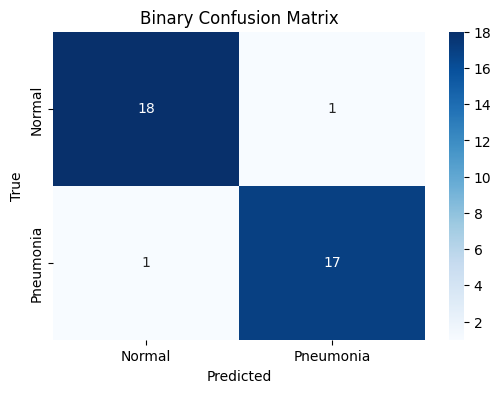

Binary model report saved to /content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/menoufia_covid/binary_model_report.csv


In [17]:
def main():
    base_input = '/content/drive/MyDrive/data/menoufia_covid'
    output_path = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/menoufia_covid'
    os.makedirs(output_path, exist_ok=True)

    print("==== Binary Classification ====")
    #run_binary_classification_create_csv(base_input, output_path)

    # To run single-model (XGBoost):
    run_binary_classification_train_eval_model(output_path)

    # To run multi-model:
    #run_binary_classification_multi_model(output_path)

if __name__ == "__main__":
    main()

#                     Code divider between binary and multi-class classification

# Multi-class classification

### Extract features from the images

In [ ]:
def run_multiclass_classification_create_csv(base_input, output_path):
  """
  Run multi-class classification (Normal vs. Pneumonia vs. COVID) using images from specified folders.

  Parameters:
      base_input (str): Base input folder containing subfolders (train/NORMAL, train/PNEUMONIA, train/COVID, etc.).
      output_path (str): Output folder for CSV reports.
  """
  print("==== Multi-class Classification (Normal vs. Pneumonia vs. COVID) ====")
  categories = {
      'train_normal': 'train/NORMAL',
      'train_pneumonia': 'train/PNEUMONIA',
      'train_covid': 'train/COVID',
      'test_normal': 'test/NORMAL',
      'test_pneumonia': 'test/PNEUMONIA',
      'test_covid': 'test/COVID'
  }
  try:
      wavelet = build_modified_coif1(perturbation=0.05) #0.05
  except Exception as e:
      print("Failed to build modified wavelet:", e)
      return

  for cat, rel_path in categories.items():
      folder_path = os.path.join(base_input, rel_path)
      print(f"Processing {cat} images from {folder_path}")
      try:
          df = process_images_from_folder(folder_path, wavelet, quant_binWidth=25)
          output_csv = os.path.join(output_path, f'{cat}_wave.csv')
          save_features_to_csv(df, output_csv)
      except Exception as e:
          print(f"Error processing {cat}: {e}")

### Create model and perform evaluation

In [ ]:
def run_multiclass_classification_train_eval_model(output_path):
  '''
  This code below is to create multi class classification

  '''
  try:
      df_train_normal = pd.read_csv(os.path.join(output_path, 'train_normal_wave.csv'))
      df_train_pneu = pd.read_csv(os.path.join(output_path, 'train_pneumonia_wave.csv'))
      df_train_covid = pd.read_csv(os.path.join(output_path, 'train_covid_wave.csv'))
      df_test_normal = pd.read_csv(os.path.join(output_path, 'test_normal_wave.csv'))
      df_test_pneu = pd.read_csv(os.path.join(output_path, 'test_pneumonia_wave.csv'))
      df_test_covid = pd.read_csv(os.path.join(output_path, 'test_covid_wave.csv'))

      # output_path1 = '/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/jagannath'
      # df_test_normal = pd.read_csv(os.path.join(output_path1, 'test_normal_wave.csv'))
      # df_test_pneu = pd.read_csv(os.path.join(output_path1, 'test_pneumonia_wave.csv'))
      # df_test_covid = pd.read_csv(os.path.join(output_path1, 'test_covid_wave.csv'))
  except Exception as e:
      print("Error loading CSV files for multi-class classification:", e)
      return

  print("Multi-class Image Counts:")
  print("  Train Normal:", len(df_train_normal))
  print("  Train Pneumonia:", len(df_train_pneu))
  print("  Train COVID:", len(df_train_covid))
  print("  Test Normal:", len(df_test_normal))
  print("  Test Pneumonia:", len(df_test_pneu))
  print("  Test COVID:", len(df_test_covid))

  df_train_normal['label'] = 0
  df_train_pneu['label'] = 1
  df_train_covid['label'] = 2
  df_test_normal['label'] = 0
  df_test_pneu['label'] = 1
  df_test_covid['label'] = 2

  eng_normal = pd.concat([df_train_normal, df_test_normal], ignore_index=True)
  eng_pneu = pd.concat([df_train_pneu, df_test_pneu], ignore_index=True)
  eng_covid = pd.concat([df_train_covid, df_test_covid], ignore_index=True)

  eng_train_normal, eng_test_normal = train_test_split(eng_normal, test_size=0.2, random_state=42)
  eng_train_pneu, eng_test_pneu = train_test_split(eng_pneu, test_size=0.2, random_state=42)
  eng_train_covid, eng_test_covid = train_test_split(eng_covid, test_size=0.2, random_state=42)

  eng_train_df = pd.concat([eng_train_normal, eng_train_pneu, eng_train_covid]).sample(frac=1, random_state=42).reset_index(drop=True)
  eng_test_df = pd.concat([eng_test_normal, eng_test_pneu, eng_test_covid]).sample(frac=1, random_state=42).reset_index(drop=True)

  print("\nTraining set class counts:")
  print(eng_train_df['label'].value_counts().sort_index())
  print("\nTest set class counts:")
  print(eng_test_df['label'].value_counts().sort_index())
  print("\nTest data shape:", eng_test_df.shape)

  # selected_features = ['LH_std'
  #                      ,'HH_energy'
  #                      ,'HH_std'
  #                      ,'HH_mean'
  #                      ,'LH_glcm_ClusterTendency'
  #                      ,'HH_glrlm_RunEntropy'
  #                      , 'LH_glrlm_ShortRunEmphasis'
  #                      ,'LH_glrlm_RunEntropy'
  #                      ,'LH_glcm_SumEntropy'
  #                      ,'LH_glrlm_RunLengthNonUniformityNormalized'
  #                       ,'HH_glrlm_RunLengthNonUniformityNormalized'
  #                       ]

  selected_features = ['LH_std',
                            'HH_mean','HH_std','HH_energy',
                            'LH_glcm_ClusterTendency', 'LH_glcm_SumEntropy',
                          'grad_entropy_mean',
                          #'sobel_edge_mean',
                          'frangi_mean',
                            #'LH_glcm_Imc1',
                            #'HH_glcm_Id','HH_glcm_Idn','HH_glcm_Idmn','HH_glcm_Idm','HH_glcm_Imc1','HH_glcm_Imc2',
                            'LH_glrlm_RunEntropy','LH_glrlm_ShortRunEmphasis','LH_glrlm_RunLengthNonUniformityNormalized',
                            'HH_glrlm_RunEntropy','HH_glrlm_RunLengthNonUniformityNormalized'
                            ]

  numeric_cols = eng_train_df.select_dtypes(include=[float, int]).columns.tolist()
  if 'label' in numeric_cols:
      numeric_cols.remove('label')
  features_to_use = [feat for feat in selected_features if feat in numeric_cols]
  if not features_to_use:
      features_to_use = numeric_cols

  X_train = eng_train_df[features_to_use].values
  X_test = eng_test_df[features_to_use].values
  y_train = eng_train_df['label'].values
  y_test = eng_test_df['label'].values

  print("X_train shape:", X_train.shape)
  print("X_test shape:", X_test.shape)

  params = {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 300}
  results = train_evaluate_classifier(X_train, y_train, X_test, y_test, params=params)

  print("Multi-class Classification Results:")
  print("AUC:", results['auc'])
  print("Confusion Matrix:\n", results['cm'])
  print("Classification Report:\n", results['report'])

  plot_confusion_matrix(results['cm'], classes=['Normal', 'Pneumonia', 'COVID'], title="Multi-class Confusion Matrix")

  report_csv = os.path.join(output_path, "multiclass_model_report.csv")
  try:
      with open(report_csv, "w") as f:
          f.write("AUC,{}\n".format(results['auc']))
          f.write("Confusion Matrix,\n")
          import numpy as np
          np.savetxt(f, results['cm'], fmt='%d', delimiter=",")
          f.write("\nClassification Report,\n")
          f.write(results['report'])
      print(f"Multi-class model report saved to {report_csv}")
  except Exception as e:
      print("Error saving multi-class model report:", e)

## multiclass multimodel classification

In [ ]:
# def run_multiclass_multimodel_train_eval_model(output_path):
#     """
#     Loads CSV files, splits data, and evaluates multiple models (XGBoost, RandomForest, ANN, etc.),
#     and saves a comprehensive CSV report with all metrics.
#     """
#     import os
#     import pandas as pd
#     import numpy as np
#     from sklearn.model_selection import train_test_split
#     from pneumowave.models import train_evaluate_multi_classifier

#     # Load CSV files
#     try:
#       df_train_normal = pd.read_csv(os.path.join(output_path, 'train_normal_wave.csv'))
#       df_train_pneu = pd.read_csv(os.path.join(output_path, 'train_pneumonia_wave.csv'))
#       df_train_covid = pd.read_csv(os.path.join(output_path, 'train_covid_wave.csv'))
#       df_test_normal = pd.read_csv(os.path.join(output_path, 'test_normal_wave.csv'))
#       df_test_pneu = pd.read_csv(os.path.join(output_path, 'test_pneumonia_wave.csv'))
#       df_test_covid = pd.read_csv(os.path.join(output_path, 'test_covid_wave.csv'))
#     except Exception as e:
#         print("Error loading CSV files:", e)
#         return

#     # Assign labels: 0 for Normal, 1 for Pneumonia.
#     df_train_normal['label'] = 0
#     df_train_pneu['label'] = 1
#     df_test_normal['label'] = 0
#     df_test_pneu['label'] = 1

#     # Combine data
#     eng_normal = pd.concat([df_train_normal, df_test_normal], ignore_index=True)
#     eng_pneu = pd.concat([df_train_pneu, df_test_pneu], ignore_index=True)

#     # Split each class separately (80/20 split)
#     eng_train_normal, eng_test_normal = train_test_split(eng_normal, test_size=0.2, random_state=42)
#     eng_train_pneu, eng_test_pneu = train_test_split(eng_pneu, test_size=0.2, random_state=42)

#     # Combine and shuffle
#     eng_train_df = pd.concat([eng_train_normal, eng_train_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)
#     eng_test_df = pd.concat([eng_test_normal, eng_test_pneu]).sample(frac=1, random_state=42).reset_index(drop=True)

#     # Define features
#     selected_features = ['LH_std', 'HH_energy', 'HH_std', 'HH_mean',
#                          'LH_glcm_ClusterTendency', 'HH_glrlm_RunEntropy',
#                          'LH_glrlm_ShortRunEmphasis', 'LH_glrlm_RunEntropy',
#                          'LH_glcm_SumEntropy', 'LH_glrlm_RunLengthNonUniformityNormalized',
#                          'HH_glrlm_RunLengthNonUniformityNormalized']

#     numeric_cols = eng_train_df.select_dtypes(include=[float, int]).columns.tolist()
#     if 'label' in numeric_cols:
#         numeric_cols.remove('label')
#     features_to_use = [feat for feat in selected_features if feat in numeric_cols]
#     if not features_to_use:
#         features_to_use = numeric_cols

#     X_train = eng_train_df[features_to_use].values
#     X_test = eng_test_df[features_to_use].values
#     y_train = eng_train_df['label'].values.ravel()
#     y_test = eng_test_df['label'].values.ravel()

#     # Call the new multi-model training function
#     output_csv = os.path.join(output_path, "multiclas_multimodel_report.csv")
#     train_evaluate_multi_classifier(X_train, y_train, X_test, y_test, output_csv)

# Run multi-class classification main function


==== Multi-class Classification ====
Multi-class Image Counts:
  Train Normal: 850
  Train Pneumonia: 900
  Train COVID: 950
  Test Normal: 150
  Test Pneumonia: 150
  Test COVID: 150

Training set class counts:
label
0    800
1    840
2    880
Name: count, dtype: int64

Test set class counts:
label
0    200
1    210
2    220
Name: count, dtype: int64

Test data shape: (630, 30)
X_train shape: (2520, 13)
X_test shape: (630, 13)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:51:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Multi-class Classification Results:
AUC: 0.9256893896617987
Confusion Matrix:
 [[141  16  43]
 [  8 193   9]
 [ 43  13 164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72       200
           1       0.87      0.92      0.89       210
           2       0.76      0.75      0.75       220

    accuracy                           0.79       630
   macro avg       0.79      0.79      0.79       630
weighted avg       0.79      0.79      0.79       630



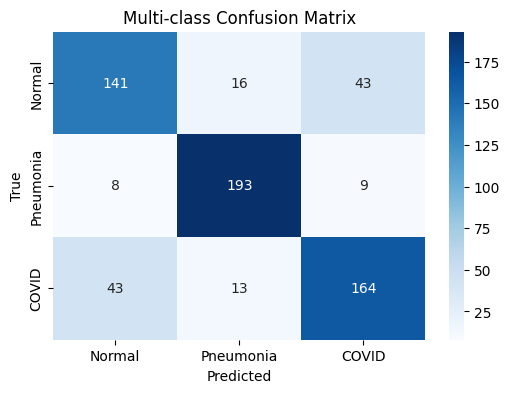

Multi-class model report saved to /content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/jagannath/multiclass_model_report.csv

==== Multi-class Classification ====


In [ ]:
def main():
    base_input = os.path.join('/content/drive/MyDrive/data/', 'jammu')
    output_path = os.path.join('/content/drive/MyDrive/pneumonia_classification/pneumowave_key_features/', 'jagannath')
    os.makedirs(output_path, exist_ok=True)

    #print("==== Binary Classification ====")
    #run_multiclass_classification_create_csv(base_input, output_path)

    print("\n==== Multi-class Classification ====")
    run_multiclass_classification_train_eval_model(output_path)

    print("\n==== Multi-class Classification ====")
    #run_multiclass_multimodel_train_eval_model(output_path)

if __name__ == "__main__":
    main()